# Q-Learning Algorithm


| **1**  | **2**  | **3**  | **4**  |
| ------ | ------ | ------ | ------ |
| **5**  | **6**  | **7**  | **8**  |
| **9**  | **10** | **11** | **12** |
| **13** | **14** | **15** | **16** |


| **1**  | **2**  | **3**  | 
| ------ | ------ | ------ |
| **4**  | **5**  | **6**  |
| **7**  | **8** | **9** |


$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha  (R_t + \gamma \max_{a} Q(s_{t+1,},a) - Q(s_t, a_t))
$$


In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:

grid_graph = {
    "1": [("2", "right"), ("5", "down")],
    "2": [("1", "left"), ("3", "right"), ("6", "down")],
    "3": [("2", "left"), ("4", "right"), ("7", "down")],
    "4": [("3", "left"), ("8", "down")],
    "5": [("1", "up"), ("6", "right"), ("9", "down")],
    "6": [("2", "up"), ("5", "left"), ("7", "right"), ("10", "down")],
    "7": [("3", "up"), ("6", "left"), ("8", "right"), ("11", "down")],
    "8": [("4", "up"), ("7", "left"), ("12", "down")],
    "9": [("5", "up"), ("10", "right"), ("13", "down")],
    "10": [("6", "up"), ("9", "left"), ("11", "right"), ("14", "down")],
    "11": [("7", "up"), ("10", "left"), ("12", "right"), ("15", "down")],
    "12": [("8", "up"), ("11", "left"), ("16", "down")],
    "13": [("9", "up"), ("14", "right")],
    "14": [("10", "up"), ("13", "left"), ("15", "right")],
    "15": [("11", "up"), ("14", "left"), ("16", "right")],
    "16": [("12", "up"), ("15", "left")],
}
# grid_graph = {
#     "1": [("2", "right"), ("4", "down")],
#     "2": [("1", "left"), ("3", "right"), ("5", "down")],
#     "3": [("2", "left"), ("6", "down")],

#     "4": [("1", "up"), ("5", "right"), ("7", "down")],
#     "5": [("2", "up"), ("4", "left"), ("6", "right"), ("8", "down")],
#     "6": [("3", "up"), ("5", "left"), ("9", "down")],

#     "7": [("4", "up"), ("8", "right")],
#     "8": [("5", "up"), ("7", "left"), ("9", "right")],
#     "9": [("6", "up"), ("8", "left")]
# }

In [145]:
Q_states = {
    "1": {"right": 0, "up": 0, "left": 0, "down": 0},
    "2": {"right": 0, "up": 0, "left": 0, "down": 0},
    "3": {"right": 0, "up": 0, "left": 0, "down": 0},
    "4": {"right": 0, "up": 0, "left": 0, "down": 0},
    "5": {"right": 0, "up": 0, "left": 0, "down": 0},
    "6": {"right": 0, "up": 0, "left": 0, "down": 0},
    "7": {"right": 0, "up": 0, "left": 0, "down": 0},
    "8": {"right": 0, "up": 0, "left": 0, "down": 0},
    "9": {"right": 0, "up": 0, "left": 0, "down": 0},
    "10": {"right": 0, "up": 0, "left": 0, "down": 0},
    "11": {"right": 0, "up": 0, "left": 0, "down": 0},
    "12": {"right": 0, "up": 0, "left": 0, "down": 0},
    "13": {"right": 0, "up": 0, "left": 0, "down": 0},
    "14": {"right": 0, "up": 0, "left": 0, "down": 0},
    "15": {"right": 0, "up": 0, "left": 0, "down": 0},
    "16": {"right": 0, "up": 0, "left": 0, "down": 0},
}


rewards = {
    "1": -10,
    "2": -1,
    "3": -1,
    "4": -1,
    "5": -1,
    "6": -1,
    "7": -1,
    "8": -1,
    "9": -1,
    "10":-1,
    "11":-1,
    "12":-1,
    "13":-1,
    "14":-1,
    "15":-1,
    "16":10,
}


def get_neighbor_states(state: str) -> list[tuple[str, str]]:
    return grid_graph[state]


def get_state_Q(state: str, action: str) -> int:

    return Q_states[state][action]


def set_state_Q(state: str, action: str, new_value: float) -> int:
    Q_states[state][action] = new_value


def get_reward(state: str) -> int:

    return rewards[state]

In [146]:

def get_Q_update(
    state_Q: float,
    state_reward: float,
    neighbor_states: list[str],
    learning_rate: float = 0.5,
    discount_factor: float = 0.5,
    step_penalty:float = 0
) -> float:
    """_summary_

    Args:
        state_Q (float): Q value of a state
        state_reward (float): reward of a state
        learning_rate (float, optional): how much to update the Q-value. Defaults to .5.
        discount_factor (float, optional): how much future rewards are taken into account. Defaults to .5.

    Returns:
        float: _description_
    """
    neighbor_states_Q = map(lambda x: get_state_Q(*x), neighbor_states)
    return state_Q + learning_rate * (
        (state_reward + step_penalty) + discount_factor * max(neighbor_states_Q) - state_Q
    )

In [147]:
def get_neighbor_states_Q(current_state, neighbor_states):
    return list(map(lambda x: get_state_Q(*x), [[current_state, j] for _,j in neighbor_states]))

In [148]:
def get_next_state(current_state, neighbor_states):
    neighbor_states_Q = get_neighbor_states_Q(current_state, neighbor_states)
    return neighbor_states[np.argmax(neighbor_states_Q)]

In [149]:

current_state = "1"

states_follow_up = [current_state]
for i in range(150):
    print(f"Step {i+1}:")
    print(f"\tcurrent state: {current_state}")

    neighbor_states = get_neighbor_states(state=current_state)
    neighbor_states_Q = get_neighbor_states_Q(current_state=current_state,neighbor_states=neighbor_states)
    print(
        f"\tneighbor states: {neighbor_states} "
    )
    print(
        f"\tneighbor states Q values: {neighbor_states_Q} "
    )
    

    next_state = get_next_state(
        current_state=current_state, neighbor_states=neighbor_states
    )
    next_state_Q = get_state_Q(state=current_state, action=next_state[1])
    next_state_reward = get_reward(next_state[0])
    print(
        f'\tNext action: "{next_state[1]}" to state {next_state[0]} with Q value = {next_state_Q} and reward = {next_state_reward}'
    )

    updated_Q = get_Q_update(
        state_Q=next_state_Q,
        state_reward=next_state_reward,
        neighbor_states=neighbor_states,
        learning_rate=.3,
        discount_factor=.9,
        step_penalty=-.5
    )
    set_state_Q(state=current_state, action=next_state[1], new_value=updated_Q)
    print(
        f"\tUpdates Q value: {get_state_Q(state=current_state, action=next_state[1])}"
    )

    current_state = next_state[0]
    states_follow_up.append(current_state)

Step 1:
	current state: 1
	neighbor states: [('2', 'right'), ('5', 'down')] 
	neighbor states Q values: [0, 0] 
	Next action: "right" to state 2 with Q value = 0 and reward = -1
	Updates Q value: -0.44999999999999996
Step 2:
	current state: 2
	neighbor states: [('1', 'left'), ('3', 'right'), ('6', 'down')] 
	neighbor states Q values: [0, 0, 0] 
	Next action: "left" to state 1 with Q value = 0 and reward = -10
	Updates Q value: -3.15
Step 3:
	current state: 1
	neighbor states: [('2', 'right'), ('5', 'down')] 
	neighbor states Q values: [-0.44999999999999996, 0] 
	Next action: "down" to state 5 with Q value = 0 and reward = -1
	Updates Q value: -0.44999999999999996
Step 4:
	current state: 5
	neighbor states: [('1', 'up'), ('6', 'right'), ('9', 'down')] 
	neighbor states Q values: [0, 0, 0] 
	Next action: "up" to state 1 with Q value = 0 and reward = -10
	Updates Q value: -3.15
Step 5:
	current state: 1
	neighbor states: [('2', 'right'), ('5', 'down')] 
	neighbor states Q values: [-0.4499

In [150]:
i = 0
print(f"last {i} item: {states_follow_up[-i:]}")
for i, j in Q_states.items():
    print(f"State {i}:")
    print(f"\t{j}")

last 0 item: ['1', '2', '1', '5', '1', '2', '3', '2', '6', '2', '3', '4', '3', '7', '3', '2', '6', '5', '6', '7', '6', '10', '6', '2', '3', '4', '8', '4', '3', '7', '8', '7', '11', '7', '3', '2', '6', '5', '9', '5', '6', '7', '6', '10', '9', '10', '11', '10', '14', '10', '6', '2', '3', '4', '8', '12', '8', '4', '3', '7', '8', '7', '11', '12', '11', '15', '11', '7', '3', '2', '6', '5', '9', '13', '9', '5', '6', '7', '6', '10', '9', '10', '11', '10', '14', '13', '14', '15', '14', '10', '6', '2', '3', '4', '8', '12', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16', '15', '16', '12', '16']
State 1:
	{'right': -0.7649999999999999, 'up': 0, 'left': 0, 'down': -0.44999999999999996}
State 2:
	{'right': -1.247895, 'up': 0, 'left': -3.15, 'dow

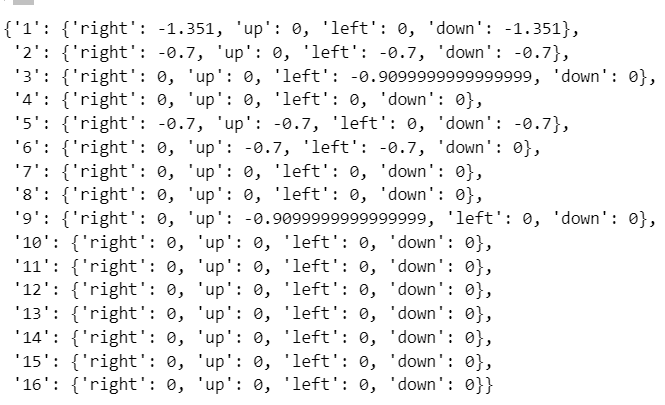